# Q1

In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss
from sklearn.preprocessing import MinMaxScaler

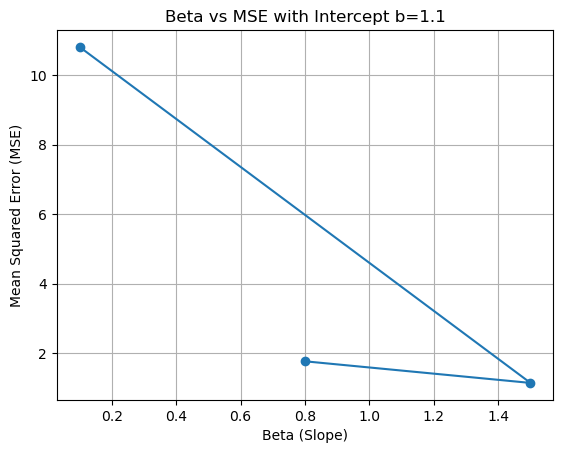

In [72]:
data = pd.read_csv('salary_experience.csv')
X = data['experience'].values
y = data['salary'].values

b = 1.1

betas = [0.1, 1.5, 0.8]

def calculate_mse(beta, intercept, X, y):
    predictions = beta * X + intercept
    mse = np.mean((predictions - y) ** 2)
    return mse

mse_values = [calculate_mse(beta, b, X, y) for beta in betas]

plt.figure()
plt.plot(betas, mse_values, marker='o')
plt.xlabel('Beta (Slope)')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Beta vs MSE with Intercept b=1.1')
plt.grid(True)
plt.show()

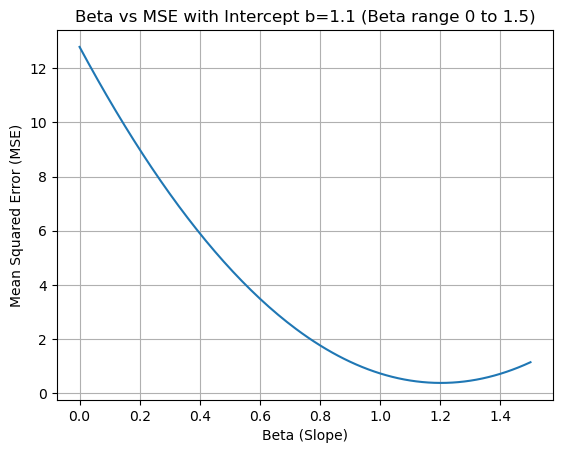

In [77]:
beta_range = np.arange(0, 1.51, 0.01)

mse_values = [calculate_mse(beta, b, X, y) for beta in beta_range]

plt.figure()
plt.plot(beta_range, mse_values)
plt.xlabel('Beta (Slope)')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Beta vs MSE with Intercept b=1.1 (Beta range 0 to 1.5)')
plt.grid(True)
plt.show()

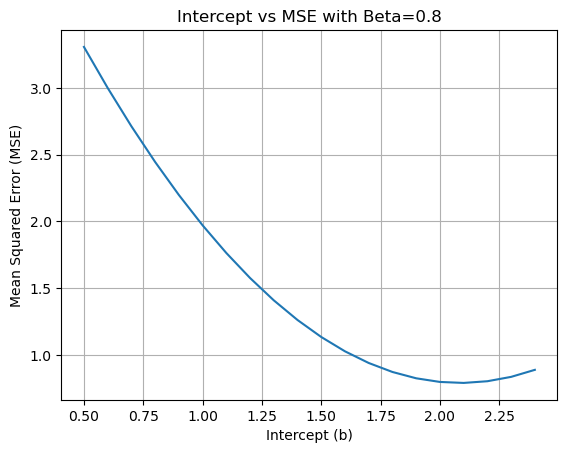

In [84]:
intercept_range = np.arange(0.5, 2.5, 0.1)
beta_value = 0.8
mse_values = [calculate_mse(beta_value, intercept, X, y) for intercept in intercept_range]

plt.figure()
plt.plot(intercept_range, mse_values)
plt.xlabel('Intercept (b)')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Intercept vs MSE with Beta=0.8')
plt.grid(True)
plt.show()

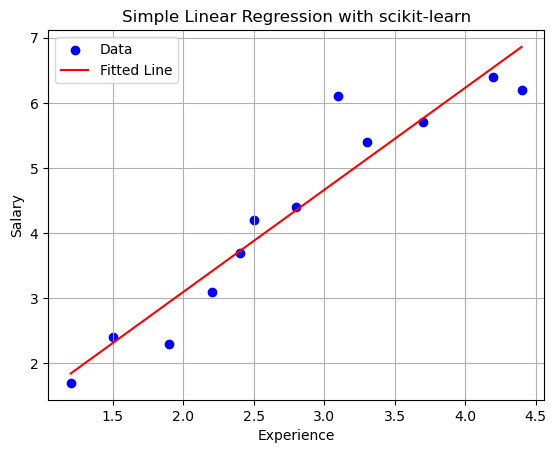

Mean Squared Error (scikit-learn): 0.23366710810280558


In [51]:
X_reshaped = X.reshape(-1, 1)
y_reshaped = y

model = LinearRegression()
model.fit(X_reshaped, y_reshaped)

y_pred = model.predict(X_reshaped)

mse_sklearn = mean_squared_error(y_reshaped, y_pred)

plt.figure()
plt.scatter(X, y, color='blue', label='Data')
plt.plot(X, y_pred, color='red', label='Fitted Line')
plt.xlabel('Experience')
plt.ylabel('Salary')
plt.title('Simple Linear Regression with scikit-learn')
plt.legend()
plt.grid(True)
plt.show()

print(f"Mean Squared Error (scikit-learn): {mse_sklearn}")

# Q2

In [52]:
data = pd.read_csv('salary_experience.csv')
X = data['experience'].values
y = data['salary'].values
scaler = MinMaxScaler()
y_normalized = scaler.fit_transform(y.reshape(-1, 1))

y_binary = (y_normalized > 0.5).astype(int) 

X = np.c_[np.ones(X.shape[0]), X] 
y_binary = y_binary.reshape(-1, 1)

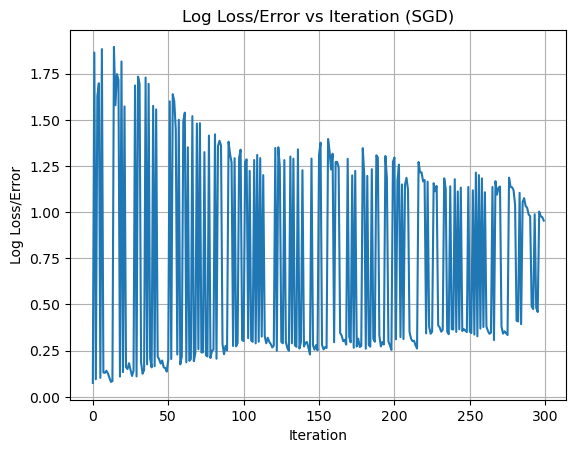

Final weights: [ 0.46885767 -0.01320696]


In [62]:
learning_rate = 0.01
epochs = 5
iterations = 60
m = X.shape[0] 

weights = np.random.rand(X.shape[1], 1) 

log_losses = []

for epoch in range(epochs):
    for i in range(iterations):
        idx = np.random.randint(m)
        X_i = X[idx:idx+1]
        y_i = y_binary[idx:idx+1]
        
        z = X_i @ weights
        y_pred = 1 / (1 + np.exp(-z))
        
        error = y_pred - y_i
        
        gradient = X_i.T @ error
        weights -= learning_rate * gradient
        
        epsilon = 1e-15  
        y_pred = np.clip(y_pred, epsilon, 1 - epsilon)  
        log_loss = -np.mean(y_i * np.log(y_pred) + (1 - y_i) * np.log(1 - y_pred))
        log_losses.append(log_loss)

plt.figure()
plt.plot(range(len(log_losses)), log_losses)
plt.xlabel('Iteration')
plt.ylabel('Log Loss/Error')
plt.title('Log Loss/Error vs Iteration (SGD)')
plt.grid(True)
plt.show()

print(f"Final weights: {weights.flatten()}")

In [64]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X[:, 1:])

model = LogisticRegression(max_iter=60, solver='lbfgs', random_state=42)
model.fit(X_scaled, y_binary.ravel())

B0, B1 = model.intercept_[0], model.coef_[0, 0]

y_pred_proba = model.predict_proba(X_scaled)[:, 1]
log_loss_sklearn = log_loss(y_binary, y_pred_proba)

print(f"Scikit-learn weights: B0 = {B0}, B1 = {B1}")
print(f"Scikit-learn log loss: {log_loss_sklearn}")

Scikit-learn weights: B0 = 0.5249845688263403, B1 = 1.5140762182794307
Scikit-learn log loss: 0.31368351269579703


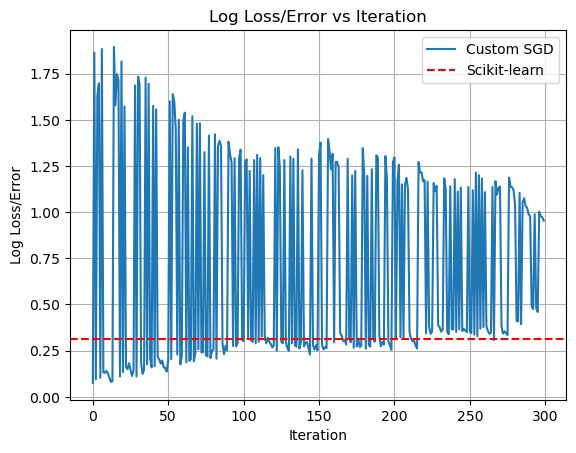

In [65]:
import numpy as np

custom_weights = np.array(weights).flatten()
iterations_custom = np.arange(0, len(log_losses))  

plt.figure()
plt.plot(iterations_custom, log_losses, label='Custom SGD')
plt.axhline(y=log_loss_sklearn, color='r', linestyle='--', label='Scikit-learn')
plt.xlabel('Iteration')
plt.ylabel('Log Loss/Error')
plt.title('Log Loss/Error vs Iteration')
plt.legend()
plt.grid(True)
plt.show()

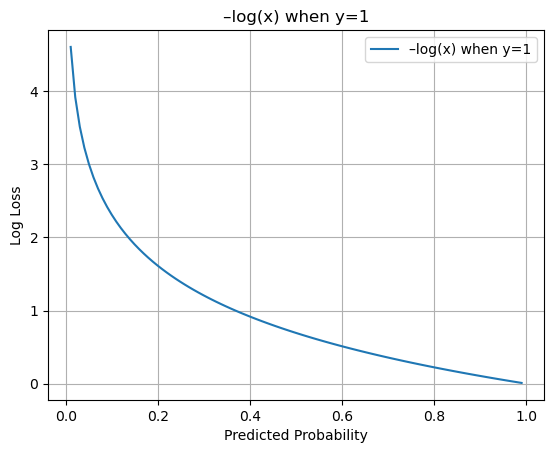

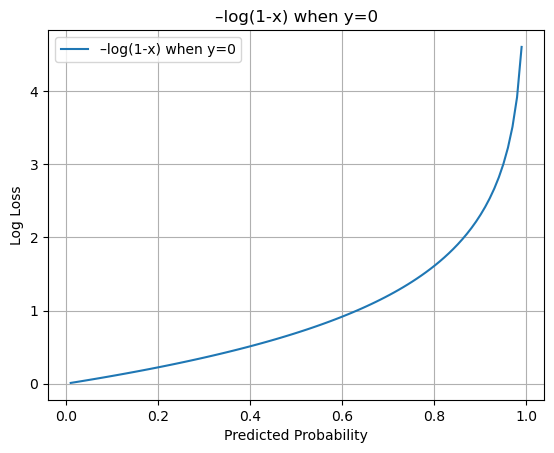

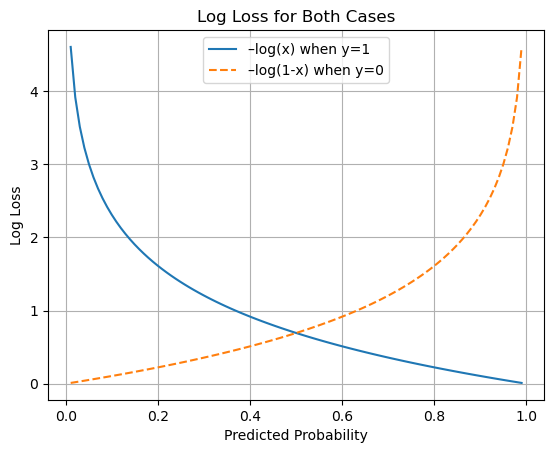

In [66]:
import numpy as np
import matplotlib.pyplot as plt

x_values = np.linspace(0.01, 0.99, 100)
log_loss_y1 = -np.log(x_values)
log_loss_y0 = -np.log(1 - x_values)

plt.figure()
plt.plot(x_values, log_loss_y1, label='–log(x) when y=1')
plt.xlabel('Predicted Probability')
plt.ylabel('Log Loss')
plt.title('–log(x) when y=1')
plt.grid(True)
plt.legend()
plt.show()

plt.figure()
plt.plot(x_values, log_loss_y0, label='–log(1-x) when y=0')
plt.xlabel('Predicted Probability')
plt.ylabel('Log Loss')
plt.title('–log(1-x) when y=0')
plt.grid(True)
plt.legend()
plt.show()

plt.figure()
plt.plot(x_values, log_loss_y1, label='–log(x) when y=1')
plt.plot(x_values, log_loss_y0, label='–log(1-x) when y=0', linestyle='--')
plt.xlabel('Predicted Probability')
plt.ylabel('Log Loss')
plt.title('Log Loss for Both Cases')
plt.grid(True)
plt.legend()
plt.show()


# Q3

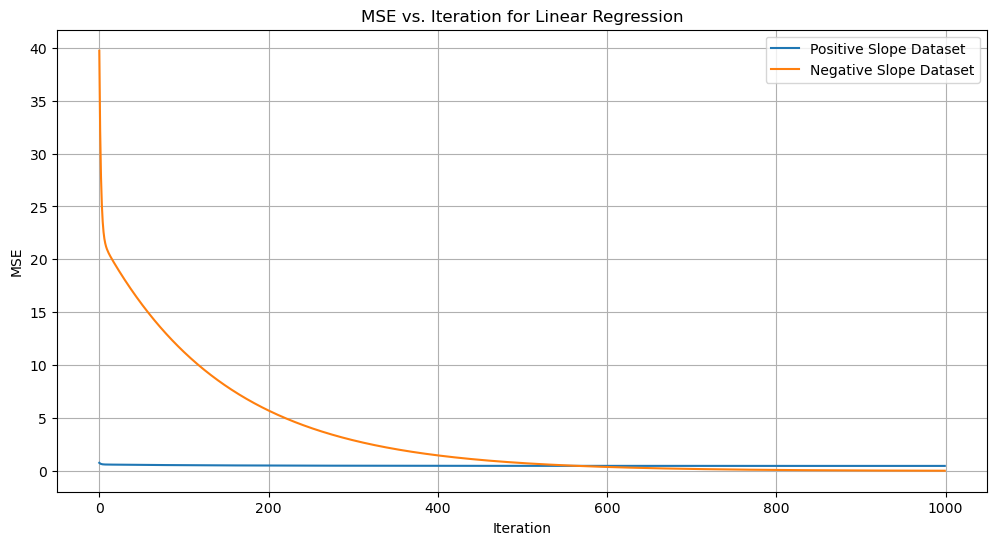

Final weights (positive slope): [0.3707696  0.80809635]
Final weights (negative slope): [11.62694952 -1.896671  ]


In [68]:
import numpy as np
import matplotlib.pyplot as plt

x_positive = np.array([1, 2, 4, 3, 5])
y_positive = np.array([1, 3, 3, 2, 5])

x_negative = np.array([1, 2, 3, 4, 5])
y_negative = np.array([10, 8, 6, 4, 2])

X_positive = np.c_[np.ones(x_positive.shape[0]), x_positive]
X_negative = np.c_[np.ones(x_negative.shape[0]), x_negative]

learning_rate = 0.01
epochs = 1000

def compute_mse(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

def linear_regression(X, y, learning_rate, epochs):
    m, n = X.shape
    weights = np.random.randn(n)
    mse_history = []
    
    for epoch in range(epochs):
        y_pred = X @ weights
        error = y_pred - y
        gradient = (2 / m) * (X.T @ error)
        weights -= learning_rate * gradient
        mse = compute_mse(y, y_pred)
        mse_history.append(mse)
    
    return weights, mse_history

weights_positive, mse_positive = linear_regression(X_positive, y_positive, learning_rate, epochs)

weights_negative, mse_negative = linear_regression(X_negative, y_negative, learning_rate, epochs)

plt.figure(figsize=(12, 6))
plt.plot(mse_positive, label='Positive Slope Dataset')
plt.plot(mse_negative, label='Negative Slope Dataset')
plt.xlabel('Iteration')
plt.ylabel('MSE')
plt.title('MSE vs. Iteration for Linear Regression')
plt.legend()
plt.grid(True)
plt.show()

print(f"Final weights (positive slope): {weights_positive}")
print(f"Final weights (negative slope): {weights_negative}")

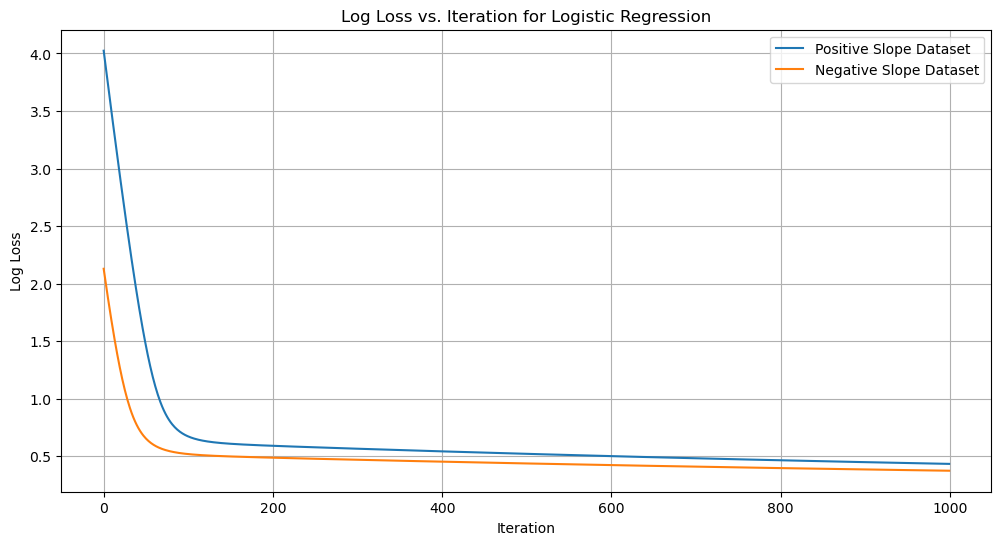

Final weights (positive slope, logistic): [-0.70340528  0.58969476]
Final weights (negative slope, logistic): [ 1.20738217 -0.75341062]


In [69]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import log_loss

x_log_positive = np.array([1, 2, 3, 4, 5])
y_log_positive = np.array([0, 0, 1, 1, 1])

x_log_negative = np.array([1, 2, 3, 4, 5])
y_log_negative = np.array([1, 1, 0, 0, 0])

X_log_positive = np.c_[np.ones(x_log_positive.shape[0]), x_log_positive]
X_log_negative = np.c_[np.ones(x_log_negative.shape[0]), x_log_negative]

learning_rate = 0.01
epochs = 1000

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def compute_log_loss(y_true, y_pred):
    epsilon = 1e-15
    y_pred = np.clip(y_pred, epsilon, 1 - epsilon)
    return -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))

def logistic_regression(X, y, learning_rate, epochs):
    m, n = X.shape
    weights = np.random.randn(n)
    log_loss_history = []
    
    for epoch in range(epochs):
        z = X @ weights
        y_pred = sigmoid(z)
        error = y_pred - y
        gradient = (1 / m) * (X.T @ error)
        weights -= learning_rate * gradient
        log_loss_value = compute_log_loss(y, y_pred)
        log_loss_history.append(log_loss_value)
    
    return weights, log_loss_history

weights_log_positive, log_loss_positive = logistic_regression(X_log_positive, y_log_positive, learning_rate, epochs)

weights_log_negative, log_loss_negative = logistic_regression(X_log_negative, y_log_negative, learning_rate, epochs)

plt.figure(figsize=(12, 6))
plt.plot(log_loss_positive, label='Positive Slope Dataset')
plt.plot(log_loss_negative, label='Negative Slope Dataset')
plt.xlabel('Iteration')
plt.ylabel('Log Loss')
plt.title('Log Loss vs. Iteration for Logistic Regression')
plt.legend()
plt.grid(True)
plt.show()

print(f"Final weights (positive slope, logistic): {weights_log_positive}")
print(f"Final weights (negative slope, logistic): {weights_log_negative}")
